In [1]:
import numpy as np

In [2]:
from keras.api.datasets import mnist
import sklearn.preprocessing

2024-12-11 14:12:33.800797: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733915553.825585  135048 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733915553.833462  135048 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-11 14:12:33.858433: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x = train_x / 255
test_x = test_x / 255

train_x.resize(60000, 784)
test_x.resize(10000, 784)

encoder = sklearn.preprocessing.OneHotEncoder()
train_y = encoder.fit_transform(train_y[..., None]).toarray()
test_y = encoder.fit_transform(test_y[..., None]).toarray()

train_x.shape, train_y.shape

((60000, 784), (60000, 10))

In [4]:
y = np.arange(35).reshape(5,7)
y

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34]])

In [5]:
y[[0, 2, 4], [0, 1, 2]]

array([ 0, 15, 30])

In [6]:
matrix = np.random.randint(1, 25, (4, 4))
window = (2, 2)
strides = (1, 1)
channels_out = 3
matrix

array([[ 1,  6,  4, 11],
       [ 5,  1, 13,  4],
       [11,  3, 18, 18],
       [ 4, 20,  8,  9]])

In [7]:
i = np.repeat(np.arange(window[0]), window[1])
col = np.tile(i, (channels_out))[:, None]
i = col + np.repeat(np.arange(3), 3)

j = np.tile(np.tile(np.arange(window[1]), window[0]), channels_out)
j = j[:, None] + np.tile(np.arange(3), 3)

# j[None, :].T + np.arange(3)



In [8]:
def get_indices(channels_out, shape, window, strides, padding):
    out_h = int((shape[0] + 2 * padding[0] - window[0]) / strides[0]) + 1
    out_w = int((shape[1] + 2 * padding[1] - window[1]) / strides[1]) + 1
    
    # i indices
    
    # base for each slide
    slide_i = np.repeat(np.arange(window[0]), window[1])
    # for each channel the same
    slide_channels_i = np.tile(slide_i, channels_out)
    # move horizontally
    i = slide_channels_i[:, None] + strides[0] * np.repeat(np.arange(out_h), out_w)
    
    # j indices
    
    # base for each slide
    slide_j = np.tile(np.arange(window[1]), window[0])
    # for each channel
    slide_channels_j = np.tile(slide_j, channels_out)
    # move vertically
    j = slide_channels_j[:, None] + strides[1] * np.tile(np.arange(out_w), out_h)

    # channel indices
    c = np.repeat(np.arange(channels_out), window[0] * window[1])[:, None]
    return i, j, c

get_indices(3, (4, 4), (2, 2), (1, 1), (0, 0))

(array([[0, 0, 0, 1, 1, 1, 2, 2, 2],
        [0, 0, 0, 1, 1, 1, 2, 2, 2],
        [1, 1, 1, 2, 2, 2, 3, 3, 3],
        [1, 1, 1, 2, 2, 2, 3, 3, 3],
        [0, 0, 0, 1, 1, 1, 2, 2, 2],
        [0, 0, 0, 1, 1, 1, 2, 2, 2],
        [1, 1, 1, 2, 2, 2, 3, 3, 3],
        [1, 1, 1, 2, 2, 2, 3, 3, 3],
        [0, 0, 0, 1, 1, 1, 2, 2, 2],
        [0, 0, 0, 1, 1, 1, 2, 2, 2],
        [1, 1, 1, 2, 2, 2, 3, 3, 3],
        [1, 1, 1, 2, 2, 2, 3, 3, 3]]),
 array([[0, 1, 2, 0, 1, 2, 0, 1, 2],
        [1, 2, 3, 1, 2, 3, 1, 2, 3],
        [0, 1, 2, 0, 1, 2, 0, 1, 2],
        [1, 2, 3, 1, 2, 3, 1, 2, 3],
        [0, 1, 2, 0, 1, 2, 0, 1, 2],
        [1, 2, 3, 1, 2, 3, 1, 2, 3],
        [0, 1, 2, 0, 1, 2, 0, 1, 2],
        [1, 2, 3, 1, 2, 3, 1, 2, 3],
        [0, 1, 2, 0, 1, 2, 0, 1, 2],
        [1, 2, 3, 1, 2, 3, 1, 2, 3],
        [0, 1, 2, 0, 1, 2, 0, 1, 2],
        [1, 2, 3, 1, 2, 3, 1, 2, 3]]),
 array([[0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
    

In [9]:
def add_padding(x, padding):
    # accepts 3d array
    return np.pad(x, ((0, 0), (padding[1], padding[1]), (padding[0], padding[0])))

In [10]:
m = np.array([matrix, np.flip(matrix)])

In [11]:
matrix

array([[ 1,  6,  4, 11],
       [ 5,  1, 13,  4],
       [11,  3, 18, 18],
       [ 4, 20,  8,  9]])

In [17]:
def im2col(x, window, strides, padding):
    if padding[0] != 0 or padding[1] != 0:
        padded = add_padding(x, padding)
    else:
        padded = x

    i, j, c = get_indices(x.shape[0], x.shape[1:], window, strides, padding)
    cols = padded[c, i, j]
    return cols

im2col(m, (2, 2), (1, 1), (0, 0))

array([[ 1,  6,  4,  5,  1, 13, 11,  3, 18],
       [ 6,  4, 11,  1, 13,  4,  3, 18, 18],
       [ 5,  1, 13, 11,  3, 18,  4, 20,  8],
       [ 1, 13,  4,  3, 18, 18, 20,  8,  9],
       [ 9,  8, 20, 18, 18,  3,  4, 13,  1],
       [ 8, 20,  4, 18,  3, 11, 13,  1,  5],
       [18, 18,  3,  4, 13,  1, 11,  4,  6],
       [18,  3, 11, 13,  1,  5,  4,  6,  1]])

In [13]:
def col2im(x_col, x_shape, window, strides, padding):
    H_padded = x_shape[1] + 2 * padding[0]
    W_padded = x_shape[2] + 2 * padding[1]
    
    new_x = np.zeros((x_shape[0], H_padded, W_padded))
    
    i, j, d = get_indices(x_shape[0], x_shape[1:], window, strides, padding)
    np.add.at(new_x, (d, i, j), x_col)
    if padding[0] != 0 or padding[1] != 0:
        return new_x[:, padding[0]:-padding[0], padding[1]:-padding[1]]
    return new_x

In [14]:
m

array([[[ 1,  6,  4, 11],
        [ 5,  1, 13,  4],
        [11,  3, 18, 18],
        [ 4, 20,  8,  9]],

       [[ 9,  8, 20,  4],
        [18, 18,  3, 11],
        [ 4, 13,  1,  5],
        [11,  4,  6,  1]]])

In [15]:
class MaxPooling:
    def __init__(self, window, strides, padding):
        self.window = window
        self.strides = strides
        self.padding = padding
        
        self.window_size = self.window[0] * self.window[1]
    
    def forward(self, x):
        assert np.ndim(x) == 3, f"Input must be a 3D array, got {x.shape}"
        
        num_channels = x.shape[0]
        
        # Сколько окон поместится по X и Y (выходная размерность для каждого канала)
        n_H = int((x.shape[1] + 2 * self.padding[0] - self.window[0])/ self.strides[0]) + 1
        n_W = int((x.shape[2] + 2 * self.padding[1] - self.window[1])/ self.strides[1]) + 1
        
        # Переводим окна в 2д матрицу
        x_col = im2col(x, self.window, self.strides, self.padding)
        # Для удобства, делаем 3д (каналы x размер окна x кол-во окон)
        x_col = x_col.reshape(num_channels, self.window_size, -1)
        
        # Делаем пулинг
        a_pol_channeled_flat = np.max(x_col, axis=1)
        a_pol = a_pol_channeled_flat.reshape((num_channels, n_H, n_W))
        
        self.cache = (num_channels, n_H, n_W, x.shape, x_col)
        return a_pol
    
    def backward(self, error):
        num_channels, n_H, n_W, input_shape, x_col = self.cache
        
        assert np.ndim(error) == 3, f"Input must be a 3D array, got {error.shape}"
        assert error.shape[0] == num_channels, \
            f"Num channels must be the same as in forward {error.shape[0]} != {num_channels}"
        
        num_windows = n_H * n_W
        
        indices = np.argmax(x_col, axis=1).reshape((num_channels, n_H, n_W))
        
        filters_indices = np.repeat(np.arange(num_channels), num_windows)
        
        window_indices = np.tile(np.arange(num_windows), num_channels)
        
        # x_col[filters_indices, indices.ravel(), window_indices].reshape((num_channels, -1))
        col_with_error = np.zeros_like(x_col)
        np.add.at(col_with_error, (filters_indices, indices.ravel(), window_indices), error.ravel())
        
        col_with_error = col_with_error.reshape((self.window_size * num_channels, num_windows))
        d_X = col2im(col_with_error, input_shape, self.window, self.strides, self.padding)
        return d_X
        

In [16]:
%%pyinstrument
pool = MaxPooling((2, 2), (1, 1), (0, 0))

m = train_x[0].reshape((1, 28, 28))

for i in range(1000):
    pooled = pool.forward(m)
    error = np.ones_like(pooled)
    grad = pool.backward(error)


UsageError: Cell magic `%%pyinstrument` not found.


In [ ]:
def col2im(x_col, x_shape, window, strides, padding):
    H_padded = x_shape[1] + 2 * padding[0]
    W_padded = x_shape[2] + 2 * padding[1]
    
    new_x = np.zeros((x_shape[0], H_padded, W_padded))
    
    i, j, d = get_indices(x_shape[0], x_shape[1:], window, strides, padding)
    np.add.at(new_x, (d, i, j), x_col)
    if padding[0] != 0 or padding[1] != 0:
        return new_x[:, padding[0]:-padding[0], padding[1]:-padding[1]]
    return new_x

In [ ]:
from typing import Tuple

In [ ]:
def get_views(x, window: Tuple[int, int], strides: Tuple[int, int]):
    """Возвращает view для исходного массива, размерностью [C x M x N x X x Y]

    Окна для свёртки
    
    Args:
        x (Nums): Исходный массив, [C x M x N]
        window (Tuple[int, int]): X x Y
        strides (Tuple[int, int]): Шаги по x и y

    Returns:
        Nums: [C x M x N x X x Y]
    """
    output_shape = (np.subtract(x.shape[-2:], window) + strides) / strides
    output_shape = tuple(np.floor(output_shape, casting='unsafe', dtype=int))
    
    # (num_channels) x (output_shape) x (filter size)
    views_shape = (x.shape[0],) + output_shape + window
    
    channel_strides, row_strides, col_strides = x.strides
    
    views = np.lib.stride_tricks.as_strided(
        x, shape=views_shape, strides=(channel_strides, row_strides * strides[0], col_strides * strides[1], row_strides, col_strides)
    )
    return views
    

In [ ]:
class MaxPool2DLayer:
    def __init__(
        self,
        kernel: Tuple[int, int],
        strides: Tuple[int, int],
    ) -> None:
        self.window = kernel
        self.strides = strides
    def forward(self, x):
        assert np.ndim(x) == 3, x.shape
        
        views = get_views(x, self.window, self.strides)
        t = np.max(views, axis=(-2, -1))
        
        self.cache = x
        return t
        
    def backward(self, error):
        assert np.ndim(error) == 3, error.shape
        
        x = self.cache
        
        de_dX = np.zeros(x.shape)
        
        views_to_write = get_views(de_dX, self.window, self.strides)
        views_to_read = get_views(x, self.window, self.strides)
        
        assert error.shape[0] == x.shape[0], f"num channels must be the same, {error.shape}, {x.shape}"

        for c in range(views_to_read.shape[0]):
            for i in range(views_to_read.shape[1]):
                for j in range(views_to_read.shape[2]):
                    idx = np.argmax(views_to_read[c, i, j])
                    views_to_write[c, i, j][np.unravel_index(idx, (2, 2))] += error[c, i, j]
        return de_dX

    def update(self, learning_rate: float):
        pass

    def set_optimizer(self, optimizer):
        pass

    def __repr__(self) -> str:
        return f"<Pooling2dLayer>"


_     ._   __/__   _ _  _  _ _/_   Recorded: 13:35:46  Samples:  8556
 /_//_/// /_\ / //_// / //_'/ //     Duration: 8.621     CPU time: 8.544
/   _/                      v5.0.0

Cell [152]

8.621 ZMQInteractiveShell.run_ast_nodes  IPython/core/interactiveshell.py:3418
`- 8.620 <module>  /tmp/ipykernel_5499/934061437.py:1
   |- 8.453 MaxPool2DLayer.backward  /tmp/ipykernel_5499/793330867.py:18
   |  |- 4.959 [self]  /tmp/ipykernel_5499/793330867.py
   |  |- 3.117 argmax  numpy/_core/fromnumeric.py:1268
   |  |     [5 frames hidden]  numpy, <built-in>
   |  |- 0.159 _argmax_dispatcher  numpy/_core/fromnumeric.py:1264
   |  `- 0.156 unravel_index  numpy/_core/multiarray.py:1050
   `- 0.149 MaxPool2DLayer.forward  /tmp/ipykernel_5499/793330867.py:9
      `- 0.087 max  numpy/_core/fromnumeric.py:3080
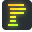

In [ ]:
%%pyinstrument
pool = MaxPool2DLayer((2, 2), (1, 1))

m = train_x[0].reshape((1, 28, 28))

for i in range(1000):
    pooled = pool.forward(m)
    error = np.ones_like(pooled)
    grad = pool.backward(error)
